#ML-Basic0: checking covariance/linear-correlation
- Pearson-correlation fast calculation with Spark's distributed cosine
- Interactive correlation checking among random variables/columns using Interactive Bokeh

Xiaowei Song (dawnwei.song AT gmail.com), Nov, 2024

In [0]:
%pip uninstall -y xProb
%pip install --verbose --no-cache-dir git+https://github.com/dawnsong/xProb.git
# %pip install bokeh
# dbutils.library.restartPython() #Databricks 13.3
%restart_python

Found existing installation: xProb 0.0.1
Uninstalling xProb-0.0.1:
  Successfully uninstalled xProb-0.0.1
Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.
Using pip 23.2.1 from /local_disk0/.ephemeral_nfs/envs/pythonEnv-88c30c98-825d-48a8-bd21-1cd8959faedd/lib/python3.11/site-packages/pip (python 3.11)
  Cloning https://github.com/dawnsong/xProb.git to /tmp/pip-req-build-ac9vru74
  Running command git version
  git version 2.43.0
  Running command git clone --filter=blob:none https://github.com/dawnsong/xProb.git /tmp/pip-req-build-ac9vru74
  Cloning into '/tmp/pip-req-build-ac9vru74'...
  Running command git rev-parse HEAD
  7d3a741f36e68b773e1bb7fbbcff704b7a7ce6ac
  Resolved https://github.com/dawnsong/xProb.git to commit 7d3a741f36e68b773e1bb7fbbcff704b7a7ce6ac
  Running command git rev-parse HEAD
  7d3a741f36e68b773e1bb7fbbcff704b7a7ce6ac
  Installing build dependencies: started
  Running command pip subproce

In [0]:
from pyspark.sql.functions import rand, randn, col
d1=spark.range(0, 5000, 1, 1).withColumn('rand1', rand() * 1.5)\
    .withColumn('rand2', randn() * 2)\
    .withColumn('rand3', rand() * -5)\
    .withColumn('noise', randn() )\
    .withColumn('rand27', col('rand2')+.7*2*col('noise')) #rand27 may have Pearson correlation with rand2 aproximate about 0.7
display(d1.limit(5))

id,rand1,rand2,rand3,noise,rand27
0,0.6052961497101765,0.47642942081748424,-2.405995400247006,0.06820277314606608,0.5719133032219768
1,0.5175556654925846,-2.8183235083607365,-0.2948436991040121,-0.9025349519641244,-4.0818724411105105
2,1.4945932341769506,-1.003905503671731,-4.938428112049059,0.332073523058023,-0.5390025713904989
3,0.4694026953485503,0.5651585732634093,-3.4590827058538,0.9457412781348254,1.8891963626521648
4,0.20187454415240125,-0.253161514688965,-3.686394443131959,-0.09641624938887307,-0.3881442638333873


In [0]:
d1.stat.corr('rand2', 'rand27') #0.818

0.8272198834941065

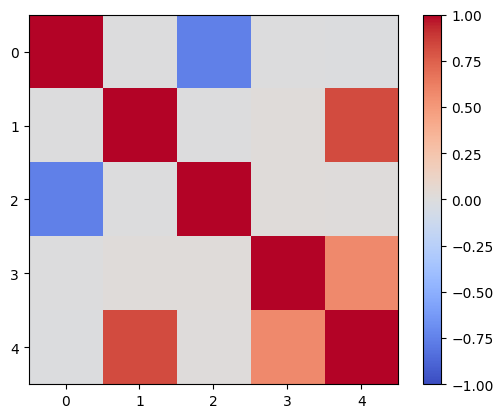

In [0]:
from xProb.corr import pcorr4df, bokeh4pcorr, bokeh4pcorr_v1
rmat, rsim, labels=pcorr4df(d1.drop('id'), imshow=True)

In [0]:
html=bokeh4pcorr(rmat, labels, width=900, height=800, title="Pearson Correlation")

<!DOCTYPE html>
 
 
 
 Pearson Correlation

In [0]:
displayHTML(html)

<!DOCTYPE html>
 
 
 
 Pearson Correlation